In [1]:
from torchvision import datasets, transforms

In [2]:
trans = transforms.Compose([
    transforms.ToTensor()
])

In [4]:
train_dataset = datasets.MNIST(
    '../data', train=True, transform=trans, download=True
)

test_dataset = datasets.MNIST(
    '../data', train=False, transform=trans, download=True
)

In [5]:
from torch.utils.data import DataLoader

In [6]:
BATCHSIZE = 64
train_iter = DataLoader(train_dataset, batch_size=BATCHSIZE, shuffle=True)
test_iter = DataLoader(test_dataset, batch_size=BATCHSIZE)

In [8]:
imgs, labels = next(iter(train_iter))
imgs.shape, labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def imshow(img):
    npimg = img.numpy()
    npimg = np.squeeze(npimg)
    plt.imshow(npimg)

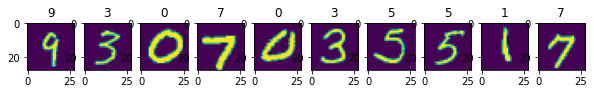

In [14]:
plt.figure(figsize=(10, 1))
for i, (img, title) in enumerate(zip(imgs[:10], labels[:10])):
    plt.subplot(1, 10, i + 1)
    plt.title(title.item())
    imshow(img)

In [18]:
import torch
from torch import nn
import torch.nn.functional as F

In [17]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(28*28, 128)
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 10)
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [25]:
def fit(epoch, model, train_iter, test_iter, loss, opt, device):

    model.to(device)

    train_correct = 0
    train_total = 0
    train_running_loss = 0

    for x, y in train_iter:
        x, y = x.to(device), y.to(device)
        y_hat = model(x)
        opt.zero_grad()
        l = loss(y_hat, y)
        l.backward()
        opt.step()
        with torch.no_grad():
            y_hat = torch.argmax(y_hat, dim=1)
            train_correct += (y_hat == y).sum().item()
            train_total += y.size(0)
            train_running_loss += l.item()
    train_loss = train_running_loss / len(train_iter.dataset)
    train_acc = train_correct / train_total

    test_correct = 0
    test_total = 0
    test_running_loss = 0
    with torch.no_grad():
        for x, y in test_iter:
            x, y = x.to(device), y.to(device)
            y_hat = model(x)
            l = loss(y_hat, y)
            y_hat = torch.argmax(y_hat, dim=1)
            test_correct += (y_hat == y).sum().item()
            test_total += y.size(0)
            test_running_loss += l.item()
    test_loss = test_running_loss / len(test_iter.dataset)
    test_acc = test_correct / test_total

    print(
        'epoch: ', epoch,
        'train_loss: ', round(train_loss, 3),
        'train_accura', round(train_acc * 100, 3), '%',
        'test_loss: ', round(test_loss, 3),
        'test_accura', round(test_acc * 100, 3), '%',
    )

    return train_loss, train_acc, test_loss, test_acc
            


In [26]:
model = Net()
loss = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=0.001)

In [27]:
num_epochs = 30

all_train_loss = []
all_train_acc = []
all_test_loss = []
all_test_acc = []

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

for epoch in range(num_epochs):
    train_loss, train_acc, test_loss, test_acc = fit(
        epoch, model, train_iter, test_iter, loss, opt, device
    )
    all_train_loss.append(train_loss)
    all_train_acc.append(train_acc)
    all_test_loss.append(test_loss)
    all_test_acc.append(test_acc)

epoch:  0 train_loss:  0.005 train_accura 90.742 % test_loss:  0.003 test_accura 95.17 %
epoch:  1 train_loss:  0.002 train_accura 95.713 % test_loss:  0.002 test_accura 96.36 %
epoch:  2 train_loss:  0.002 train_accura 97.09 % test_loss:  0.002 test_accura 96.8 %
epoch:  3 train_loss:  0.001 train_accura 97.7 % test_loss:  0.001 test_accura 97.35 %
epoch:  4 train_loss:  0.001 train_accura 98.128 % test_loss:  0.001 test_accura 97.36 %
epoch:  5 train_loss:  0.001 train_accura 98.465 % test_loss:  0.001 test_accura 97.73 %
epoch:  6 train_loss:  0.001 train_accura 98.802 % test_loss:  0.001 test_accura 97.67 %
epoch:  7 train_loss:  0.0 train_accura 99.028 % test_loss:  0.001 test_accura 97.88 %
epoch:  8 train_loss:  0.0 train_accura 99.043 % test_loss:  0.001 test_accura 97.66 %
epoch:  9 train_loss:  0.0 train_accura 99.31 % test_loss:  0.001 test_accura 97.91 %
epoch:  10 train_loss:  0.0 train_accura 99.403 % test_loss:  0.002 test_accura 96.83 %
epoch:  11 train_loss:  0.0 train

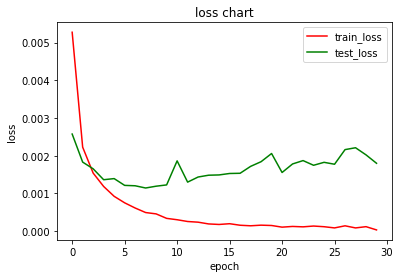

In [35]:
plt.title('loss chart')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(all_train_loss, color='r', label='train_loss')
plt.plot(all_test_loss, color='g', label='test_loss')
plt.legend()

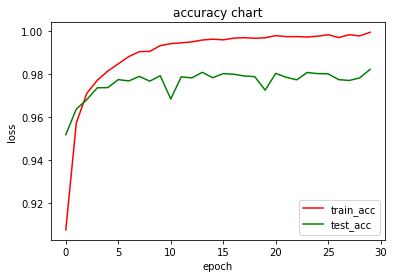

In [36]:
plt.title('accuracy chart')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(all_train_acc, color='r', label='train_acc')
plt.plot(all_test_acc, color='g', label='test_acc')
plt.legend()

### 存在过拟合现象